In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline 

In [3]:
sns.__version__

'0.11.1'

In [4]:
# color dict (use: colors['XColor'])
import ast
with open('color_palette.txt', 'r') as file:
    contents = file.read()
    colors = ast.literal_eval(contents)
    
# colors for seaborn
dark = [colors['DBrwn'], colors['DTeal'], colors['DPurp']]
med = [colors['MBrwn'], colors['MTeal'], colors['MPurp']]
light = [colors['LBrwn'], colors['LTeal'], colors['LPurp']]

In [5]:
rdrive = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/'
trainXY = pd.read_pickle(rdrive + 'nuc32_activities_scaled_1g_reindex.pkl')

In [6]:
trainXY.columns

Index(['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor',
       'AvgPowerDensity', 'ModDensity', 'UiWeight', 'ac227', 'am241', 'am243',
       'ba133', 'cf249', 'cf252', 'cm243', 'cm244', 'cm245', 'cs134', 'cs137',
       'eu152', 'eu154', 'ho166m', 'kr85', 'nb94', 'np236', 'np237', 'pa231',
       'pm146', 'pu236', 'pu238', 'pu239', 'pu240', 'ra226', 'sb125', 'th228',
       'th229', 'u232', 'u233', 'u234', 'u235'],
      dtype='object')

# Viz for features

In [8]:
lbls = ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor', 'AvgPowerDensity', 'ModDensity', 'UiWeight']

In [12]:
trainX = trainXY.drop(lbls, axis=1)

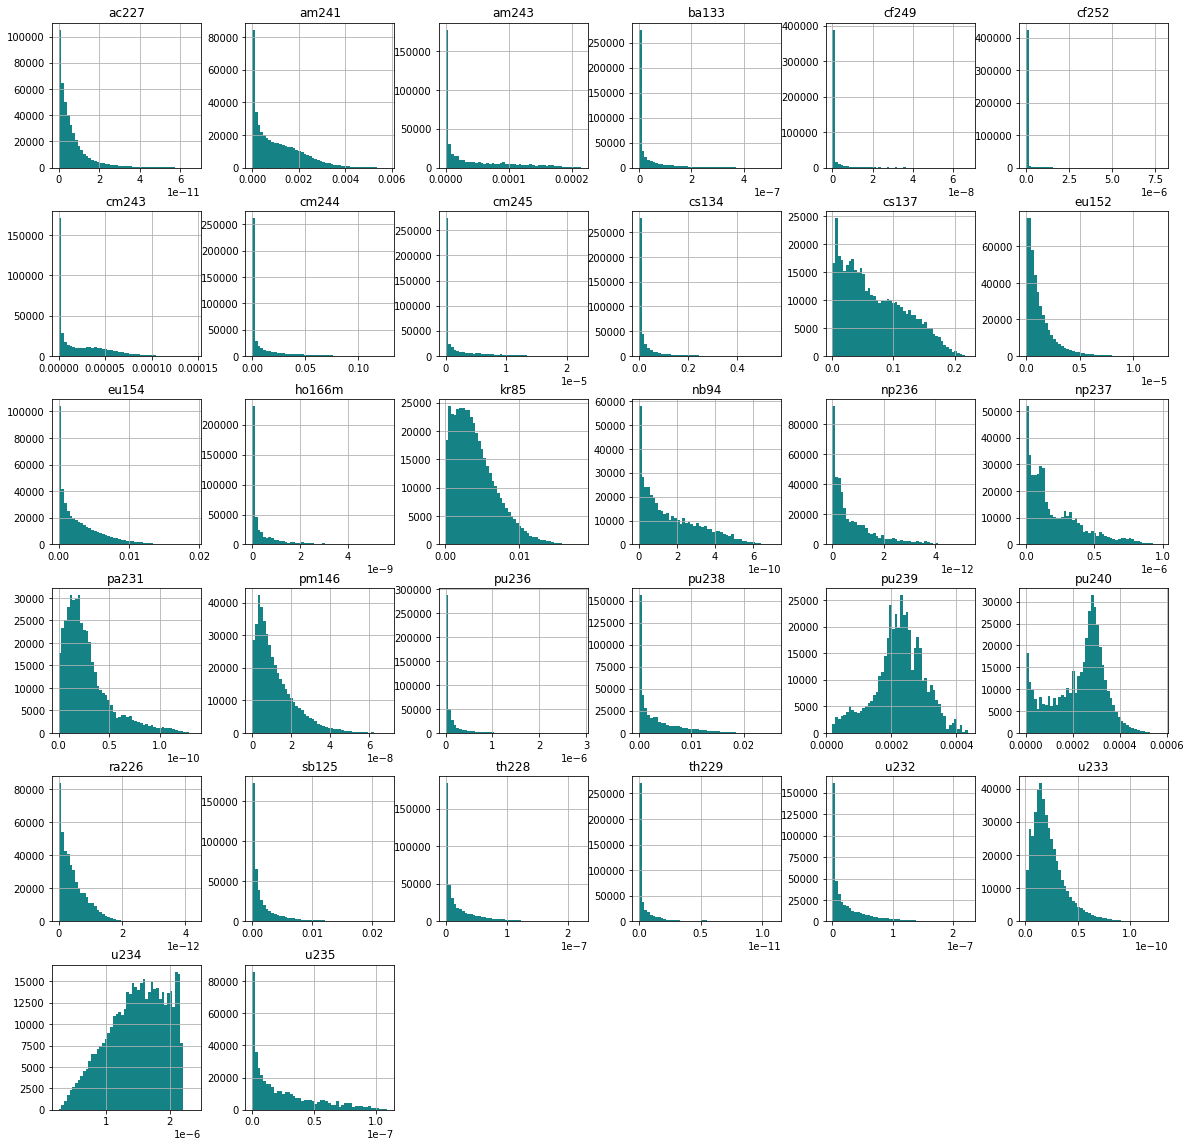

In [19]:
trainX.hist(layout=(6,6), bins=50, color=colors['MTeal'], figsize=(20, 20))
plt.savefig('./plots/histograms_trainset_features.png', bbox_inches='tight', transparent=True)

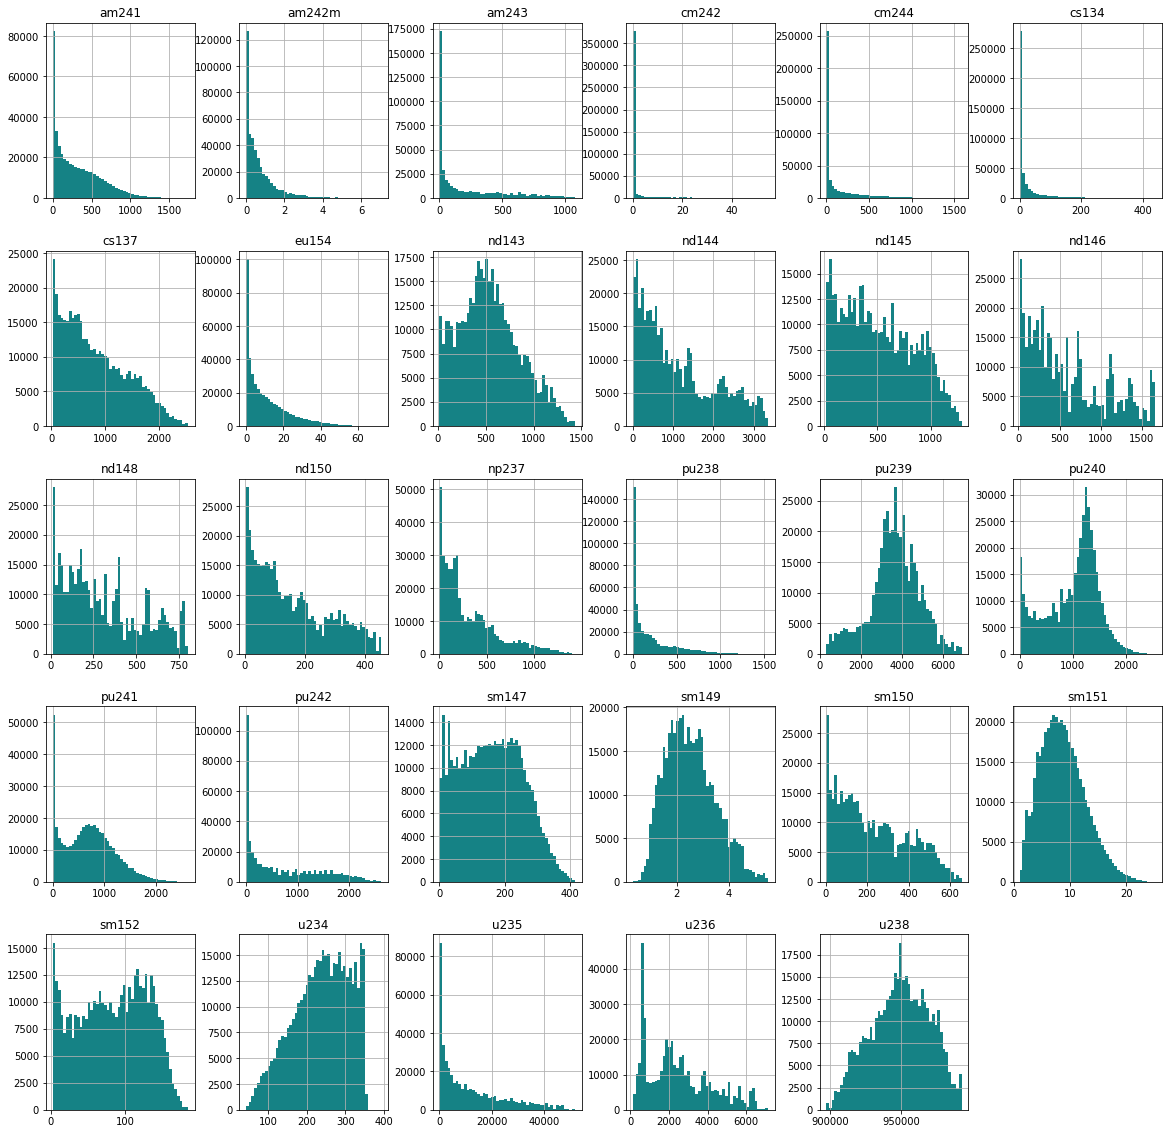

In [22]:
trainXY = pd.read_pickle(rdrive + 'sim_grams_nuc29.pkl')
trainX = trainXY.drop(lbls+['total'], axis=1)
trainX.hist(layout=(5,6), bins=50, color=colors['MTeal'], figsize=(20, 20))
plt.savefig('./plots/histograms_trainset_features.png', bbox_inches='tight', transparent=True)

# Viz for training labels

In [6]:
rxtr_name = 'Reactor Type'
trainXY[rxtr_name] = trainXY['ReactorType']

enr_name = 'Enrichment [% U235]'
trainXY[enr_name] = trainXY['Enrichment']

burn_name = 'Burnup [GWd/MTU]'
trainXY[burn_name] = trainXY['Burnup']/1000.0

cool_name = 'Cooling Time [days]'
trainXY[cool_name] = trainXY['CoolingTime']

## Unsuccessful Hist/Scatter Plots

In [7]:
x = trainXY[burn_name]
y = trainXY[enr_name]

#bin stuff
xbin = 1500
ybin = 0.15
xmax = np.max(np.abs(x))
ymax = np.max(np.abs(y))
xlim = (int(xmax/xbin) + 1)*xbin
ylim = (int(ymax/ybin) + 1)*ybin
xbins = np.arange(0, xlim + xbin, xbin)
ybins = np.arange(0, ylim + ybin, ybin)
xcount, xdivs = np.histogram(x, bins=xbins)
ycount, ydivs = np.histogram(y, bins=ybins)

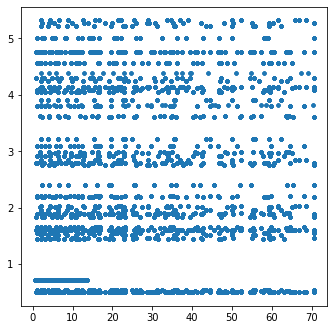

In [8]:
fig, axScatter = plt.subplots(figsize=(5.5, 5.5))
axScatter.scatter(x, y, s=10, alpha=0.5)#s=ycount*0.25
plt.show()

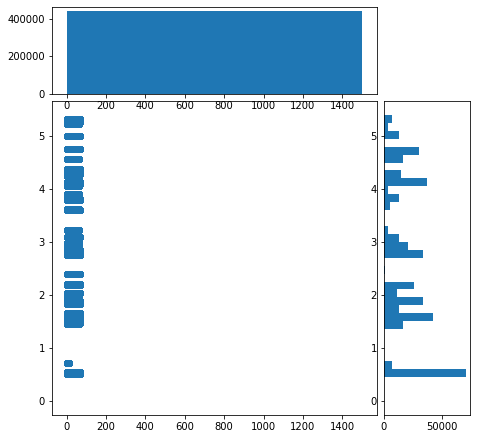

In [9]:
fig.clf()
fig, axScatter = plt.subplots(figsize=(7.5,7.5))
axScatter.scatter(x, y)
divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=axScatter)
axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=axScatter)
axHistx.hist(x, bins=xbins)
axHisty.hist(y, bins=ybins, orientation='horizontal')
#plt.draw()
plt.show()

## Training Set Histograms / Scatter Plots for Viz
run last, otherwise seaborn changes global matplotlib settings

In [19]:
train = trainXY[[burn_name, enr_name, rxtr_name, cool_name]]
plt.clf()
g = sns.set(style="ticks", font_scale=3)

<Figure size 432x288 with 0 Axes>

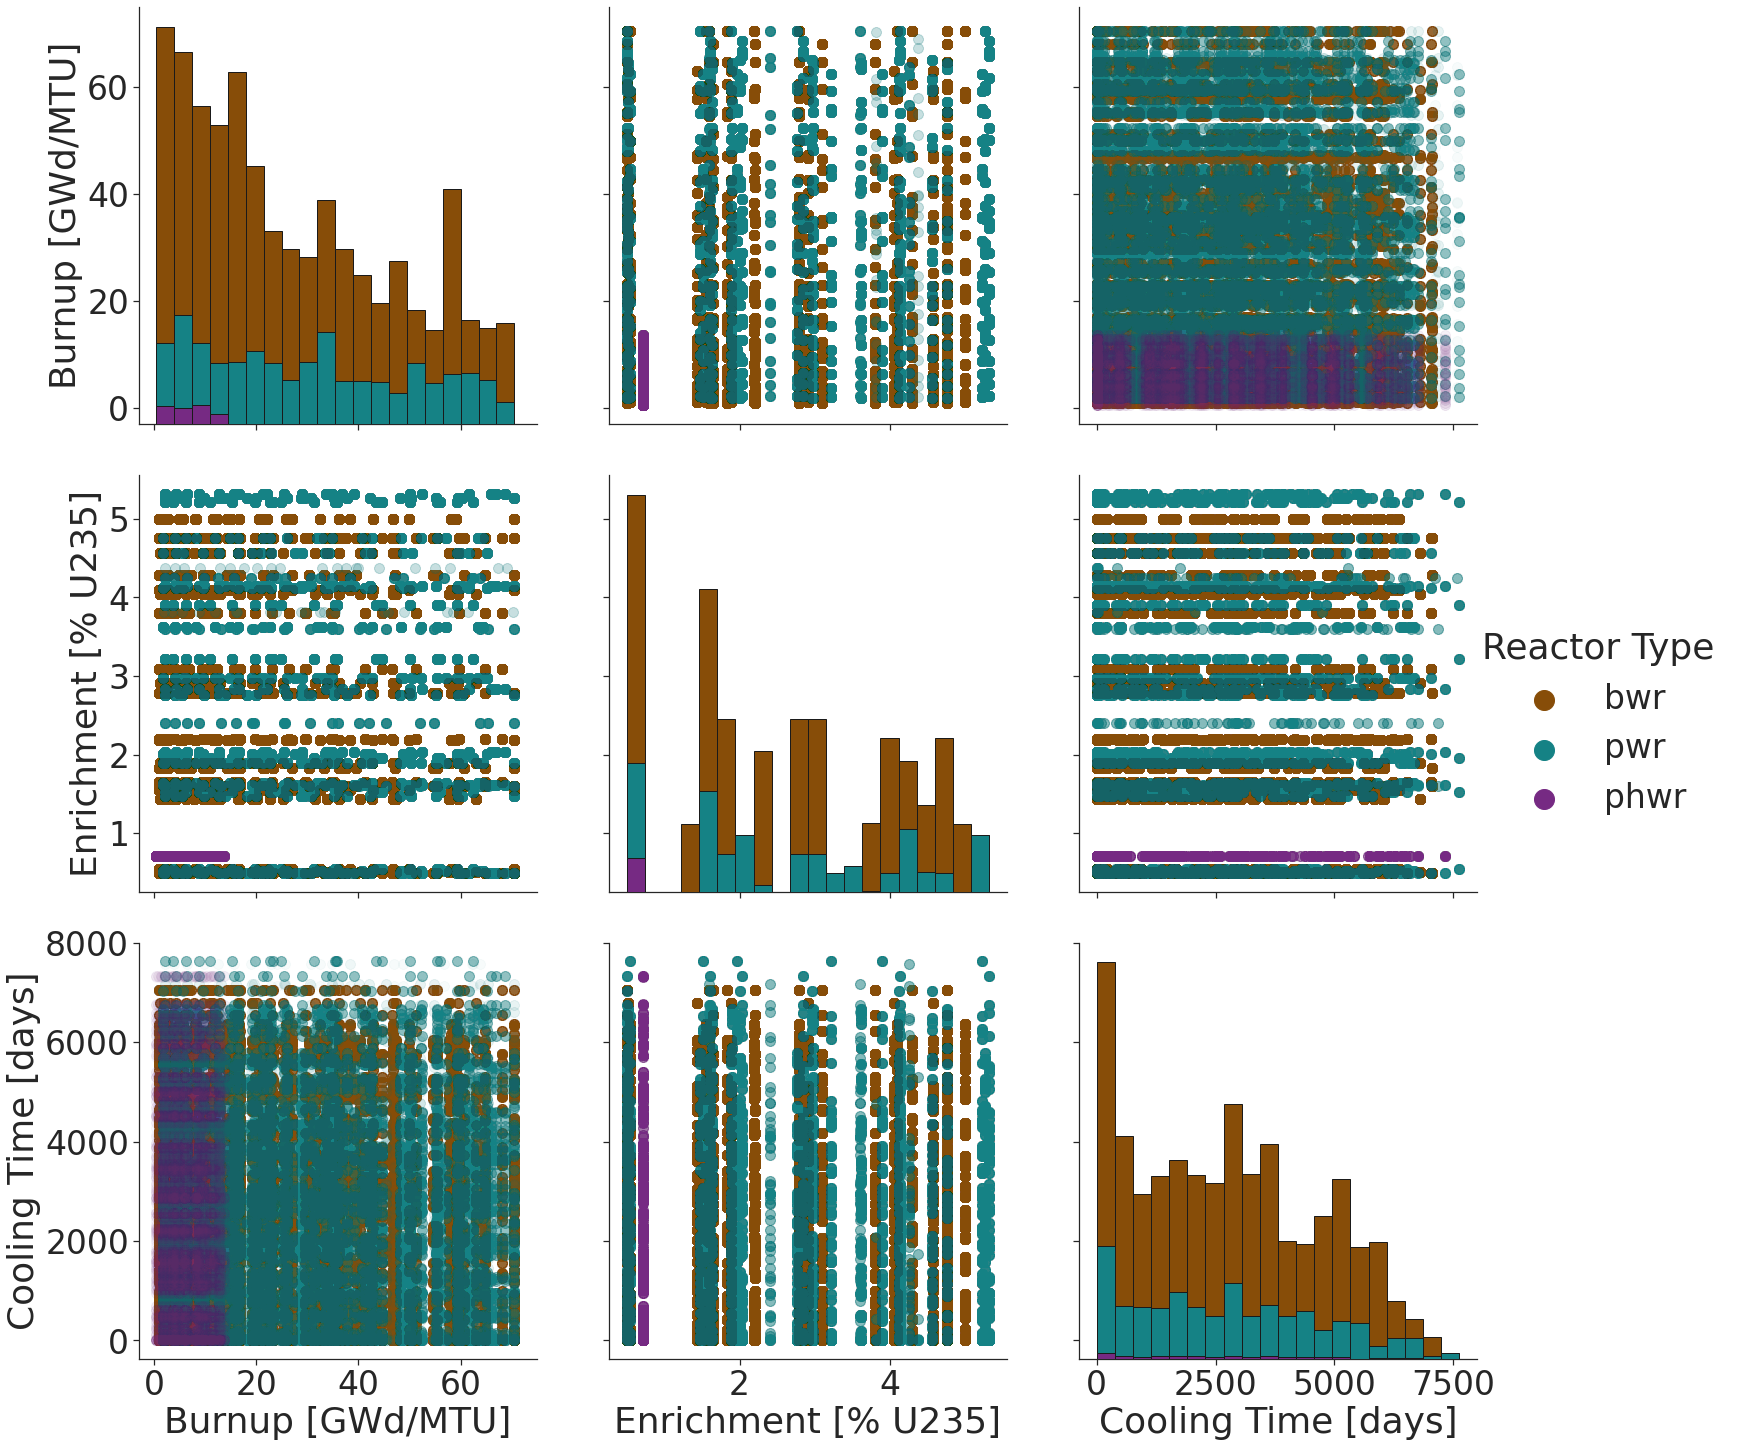

In [23]:
g = sns.PairGrid(train, hue=rxtr_name, palette=sns.color_palette(med), 
                 diag_sharey=False, height=7)
g.map_diag(sns.histplot, bins=20, multiple='stack', edgecolor="k", alpha=1)
#g.map_diag(plt.hist, bins=20, edgecolor="k", alpha=1)
g.map_offdiag(plt.scatter, s=100, alpha=0.03)
g.axes[0,0].set_ylim(-3, 75)
g.axes[2,0].set_xlim(-3, 75)
#g.axes[0,0].set_ylim(-3, 65)
#g.axes[1,0].set_xlim(-3, 65)
#g.axes[2,0].set_ylim(-200, 6000)
#g.axes[2,2].set_xlim(-200, 6000)
g.add_legend(markerscale=2)
#new_labels = ['BWR', 'PWR', 'PHWR']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
for lh in g._legend.legendHandles: lh.set_alpha(1)
    
g.savefig('./plots/histogram_scatter_trainset_viz.png', bbox_inches='tight', transparent=True)